<a href="https://colab.research.google.com/github/byteWizard07/Ha-build2/blob/main/HaBuild2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()

Saving Assignment_Habuild_Data analyst.xlsx to Assignment_Habuild_Data analyst.xlsx


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Get the uploaded file name (assuming there's only one file uploaded)
file_path = list(uploaded.keys())[0]

# Load the Excel file into pandas
xls = pd.ExcelFile(file_path)

# List all sheet names to check
print(xls.sheet_names)

['PCOD_Program_Sign_Up_Form_22K_D', 'longform', 'feedback_form', 'About', 'Questions']


In [6]:
# Load relevant sheets
longform_df = pd.read_excel(xls, sheet_name='longform')
pcod_df = pd.read_excel(xls, sheet_name='PCOD_Program_Sign_Up_Form_22K_D')

**Univariate Analysis**

In [7]:
longform_df.head()

,unique_id,I am experiencing,Submission type,Which of the following health concerns are you currently facing? (You can select multiple options):,Are any of these digestive issues affecting you? (You can select multiple options):,Are you suffering from any of the following:,Are you experiencing any of the following skin related issues? (You can select multiple options):,Do you have to take a painkiller to curb your period pain ?,Rate your period pain intensity that you feel most of the times,Added Time,CRM Status,Referrer Name,Task Owner,UTM Campaign Details,IP Address,Modified Time,Submitters Location,Submitters Latitude,Submitters Longitude
0,167637d919942ad0bbc0aab0690d6f21,I can relate to both pcod/menopause,PMP Long Form Dec24,Experiencing hot flashes,Struggling with constipation,None of the above,Dull or non-glowing skin,Rarely or Never,No pain at all !,2024-12-23 10:42:20,New Record - Record updated ; Related List ...,NaN,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant M...",49.205.102.88,NaN,NaN,NaN,NaN
1,c8c49bd7768e90d4a6670ddcd0151977,Perimenopause/menopause,PMP Long Form Dec24,"Difficulty losing weight, Inch loss challenges...",Bloating only before your menstrual cycle,None of the above,Dull or non-glowing skin,Rarely or Never,"Sometimes severe, sometimes moderate",2024-12-23 10:40:08,New Record - Record updated ; Related List ...,NaN,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant M...",107.223.21.136,NaN,NaN,NaN,NaN
2,5625080ab3c7cec7d3cd278e82688f4d7fe77d628246af...,"None of the above, here for knowledge",PMP Long Form Dec24,"Frequent mood swings, Difficulty conceiving, H...",NaN,Thriyod,"Dull or non-glowing skin, Acne on your back",Rarely or Never,"Sometimes severe, sometimes moderate",2024-12-23 10:23:53,New Record - Record added ; Related List - ...,NaN,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant M...",122.175.90.84,NaN,"Sargasan, Gandhinagar, Gandhinagar Taluka, Gan...",23.184624,72.613134
3,53f5178d6db7e9e6c27dc181544662de3eddbd244eae7c...,Pcod/Pcos,PMP Long Form Dec24,"Difficulty losing weight, Trouble falling or s...",Constant bloating,NaN,"Dull or non-glowing skin, Acne on your face",Rarely or Never,Mostly mild,2024-12-23 09:59:23,New Record - Record added ; Related List - ...,NaN,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant M...",152.58.51.122,NaN,NaN,NaN,NaN
4,2889ca97d5c21cd92904f876a97e0f2c0e4c52beb6f2f1...,"None of the above, here for knowledge",PMP Long Form Dec24,"Trouble falling or staying asleep (Insomnia), ...",Struggling with constipation,Uterine Fibroid/s,Dull or non-glowing skin,Rarely or Never,"N/A,I have menopaused",2024-12-23 09:56:46,New Record - Record added ; Related List - ...,NaN,product@habuild.in,"utm_source : Whatsapp , utm_medium : Instant M...",103.100.225.242,NaN,NaN,NaN,NaN


In [8]:
# 1. Profession Analysis
profession_counts = pcod_df["Profession"].value_counts()

In [9]:
print(profession_counts)

Profession
Homemaker                   9720
Salaried Employee           4479
Other                       1921
Freelancer/Self Employed    1700
Student                     1099
Doctor                       856
Name: count, dtype: int64


<ipython-input-10-fdd55d2c2da5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_counts.index, y=profession_counts.values, palette="viridis")


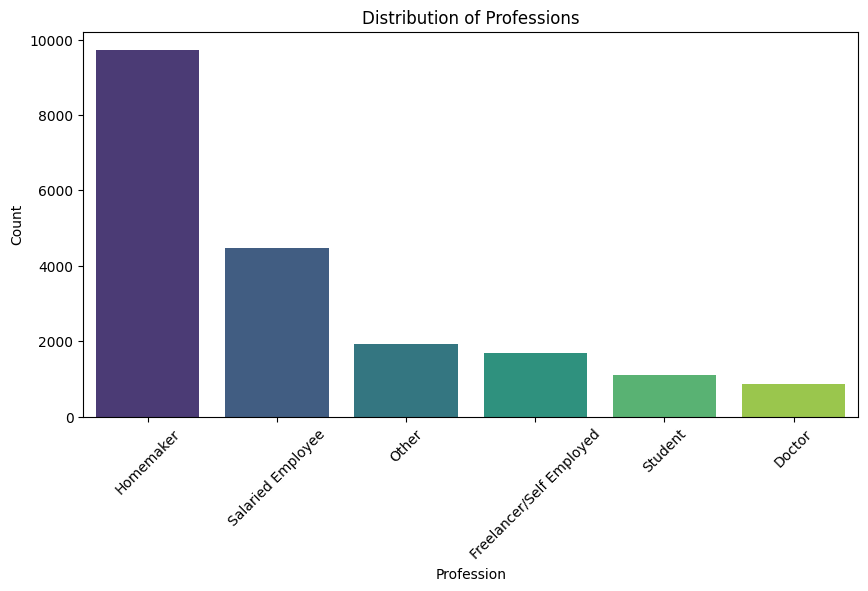

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=profession_counts.index, y=profession_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Profession")
plt.ylabel("Count")
plt.title("Distribution of Professions")
plt.show()

In [11]:
# 2. Age Group Analysis
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "66+"]
pcod_df["Age Group"] = pd.cut(pcod_df["Age"], bins=age_bins, labels=age_labels, right=False)

In [12]:
age_group_counts = pcod_df["Age Group"].value_counts().sort_index()

In [13]:
print(age_group_counts)

Age Group
0-18      172
19-25    1012
26-35    2652
36-45    6637
46-55    7978
56-65    2004
66+       611
Name: count, dtype: int64


<ipython-input-14-20071bf637ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="coolwarm")


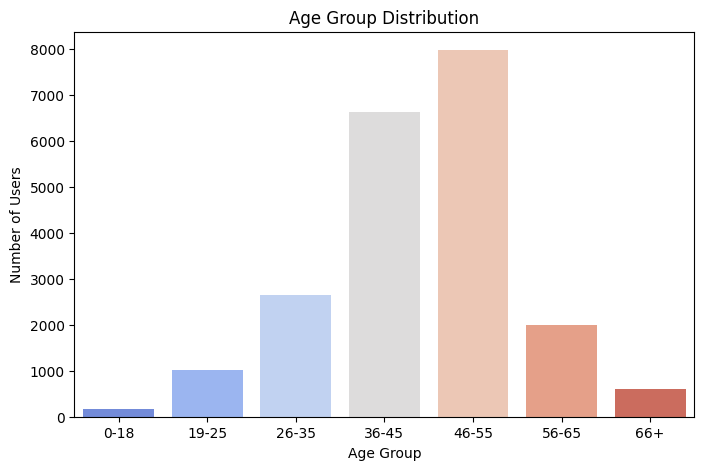

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Age Group Distribution")
plt.show()

In [15]:
# 3. Digestive Issues Analysis
digestive_issues_col = "Are any of these digestive issues affecting you? (You can select multiple options):"
digestive_counts = longform_df[digestive_issues_col].dropna().str.split(", ").explode().value_counts()
digestive_percentages = (digestive_counts / len(longform_df)) * 100

In [16]:
print(digestive_counts)

Are any of these digestive issues affecting you? (You can select multiple options):
Constant bloating                            2657
Persistent acidity                           2526
Experiencing gas pains                       2458
Struggling with constipation                 2376
Discomfort in your stomach                   2131
especially after meals                       2131
Bloating only before your menstrual cycle    1993
Experiencing smelly burps or flatulence      1340
Feeling nauseous or like vomiting often       792
Diarrhoea or frequent loose stools            455
Name: count, dtype: int64


In [17]:
print(digestive_percentages)

Are any of these digestive issues affecting you? (You can select multiple options):
Constant bloating                            24.629218
Persistent acidity                           23.414905
Experiencing gas pains                       22.784575
Struggling with constipation                 22.024472
Discomfort in your stomach                   19.753430
especially after meals                       19.753430
Bloating only before your menstrual cycle    18.474231
Experiencing smelly burps or flatulence      12.421209
Feeling nauseous or like vomiting often       7.341491
Diarrhoea or frequent loose stools            4.217649
Name: count, dtype: float64


<ipython-input-18-9b63d521e682>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=digestive_percentages.values, y=digestive_counts.index, palette="magma")


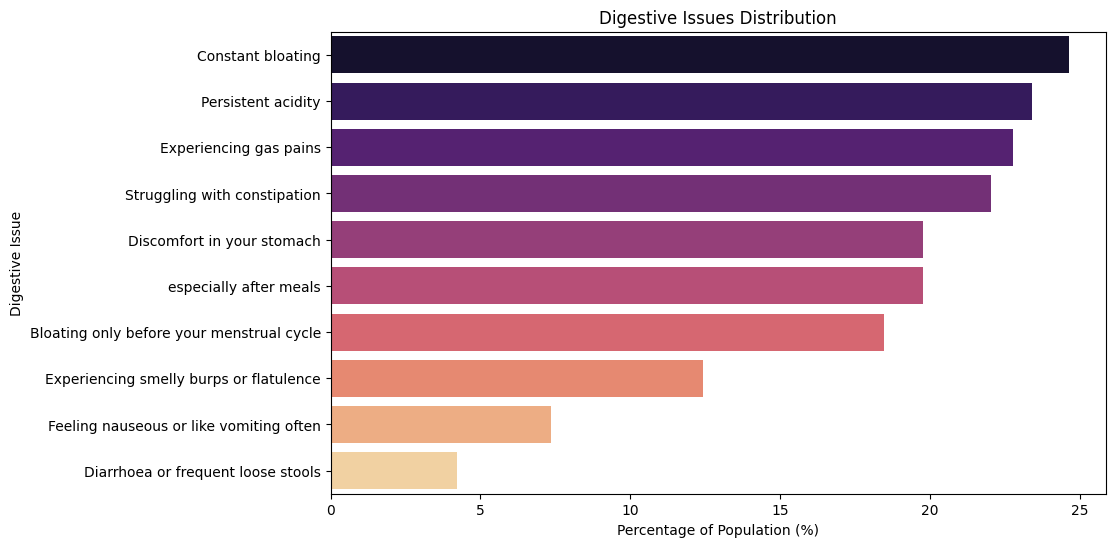

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=digestive_percentages.values, y=digestive_counts.index, palette="magma")
plt.xlabel("Percentage of Population (%)")
plt.ylabel("Digestive Issue")
plt.title("Digestive Issues Distribution")
plt.show()

**Summary of the Univariate Analysis:-**

1. **The Profession having highest Count is:** Homemaker (9720)
2. **The age group having maximum number of users is:** (46-55) {7978 users}
3. *The Count of each disease separately and the percentage of people with respect to total population is analysed above.*

**Multivariate Analysis**

In [19]:
# 4. Profession vs. Age Group Analysis
profession_age_group_pivot = pcod_df.pivot_table(index="Age Group", columns="Profession", aggfunc="size", fill_value=0)

<ipython-input-19-011f0d91f21d>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  profession_age_group_pivot = pcod_df.pivot_table(index="Age Group", columns="Profession", aggfunc="size", fill_value=0)


In [20]:
print(profession_age_group_pivot)

Profession  Doctor  Freelancer/Self Employed  Homemaker  Other  \
Age Group                                                        
0-18             4                         1          9      1   
19-25           21                        31         43     43   
26-35          106                       187        902    276   
36-45          239                       500       3277    578   
46-55          344                       778       4030    663   
56-65          103                       158       1108    242   
66+             39                        45        351    118   

Profession  Salaried Employee  Student  
Age Group                               
0-18                        1      145  
19-25                     109      719  
26-35                     785      218  
36-45                    1620       13  
46-55                    1676        3  
56-65                     274        1  
66+                        14        0  


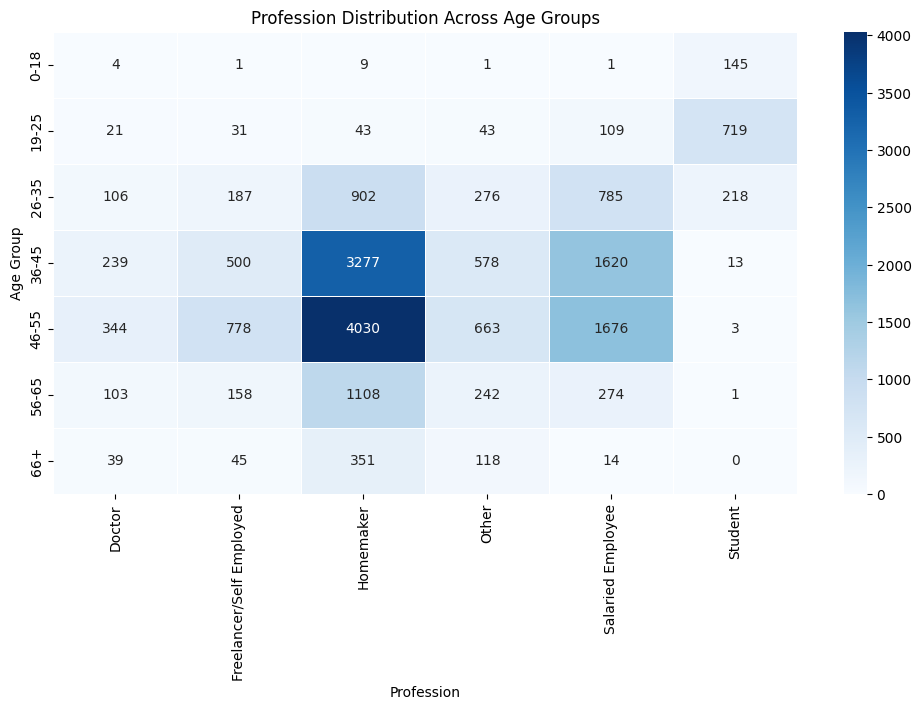

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(profession_age_group_pivot, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Profession")
plt.ylabel("Age Group")
plt.title("Profession Distribution Across Age Groups")
plt.show()

In [22]:
# 5. Correlation Matrix (Numerical Variables)
numeric_df = pcod_df.select_dtypes(include=['number']).corr()

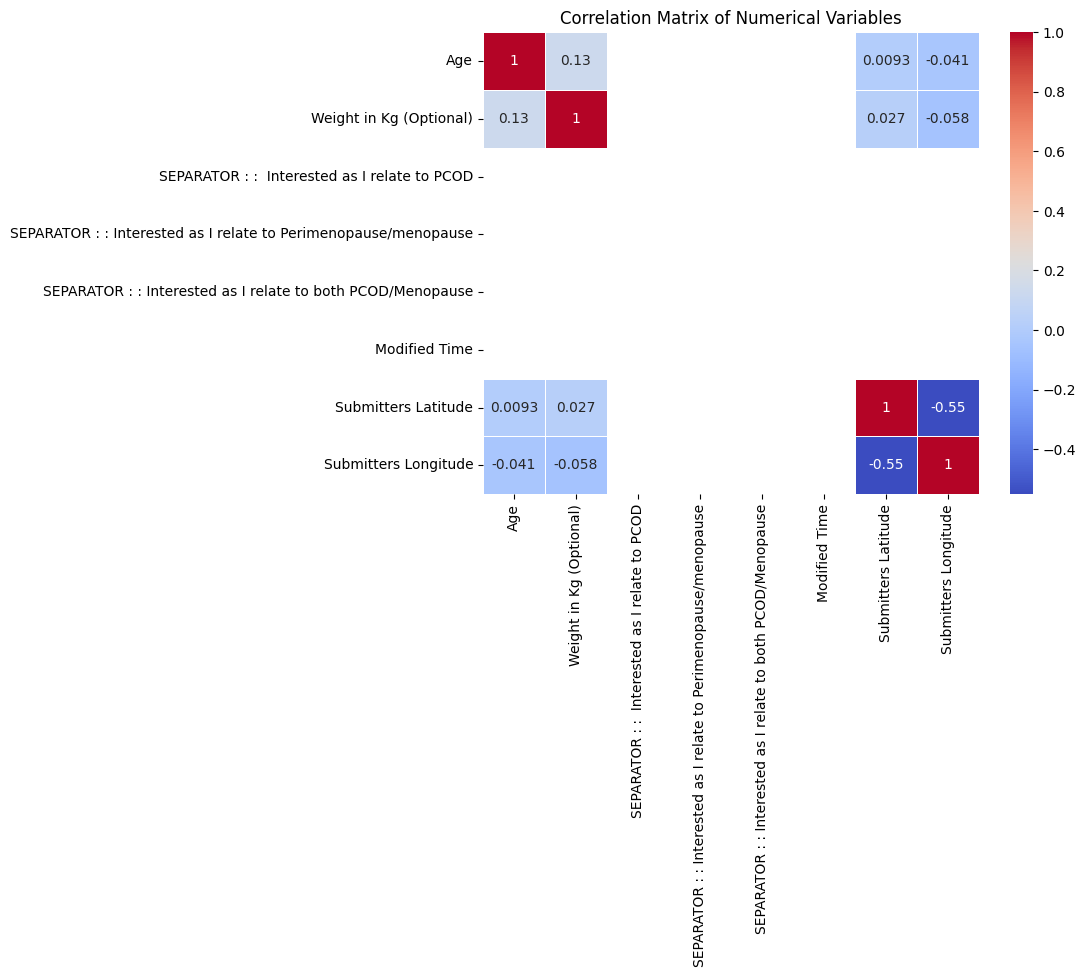

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()